# Computer Vision Assignment

#### Student Name: Stephen pangga
#### Student Numebr: 629869




#### Image resizing

In [ ]:
from PIL import Image
import os

path = r"C:\Users\Stephen Pangga\Desktop\Computer_vision_v2\All_Test_Tubes/"
new_path = r"C:\Users\Stephen Pangga\Desktop\Computer_vision_v2\Resize"
resize_ratio = 0.5  # where 0.5 is half size

def resize_aspect_fit():
    dirs = os.listdir(path)
    for item in dirs:
        if item == '.jpg':
            continue
        if os.path.isfile(path+item):
            image = Image.open(path+item)
            file_path, extension = os.path.splitext(path+item)

            new_image_height = int(image.size[0] / (1/resize_ratio))
            new_image_length = int(image.size[1] / (1/resize_ratio))

            image = image.resize((new_image_height, new_image_length), Image.ANTIALIAS)
            image.save(file_path + "_small" + extension, 'JPEG', quality=90)

resize_aspect_fit()

#### Data Augmentaion

In [ ]:
#%pip install imageio
#%pip install imgaug
#%matplotlib inline
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
import os
import cv2


# C:\Users\Stephen Pangga\Desktop\Computer_vision_v2\Resize tubes Organize Backup
generalpath = "/Users/Stephen Pangga/Desktop/Computer_vision_v2/Resize tubes Organize 220x380/"
inputpath = os.path.join(generalpath)
outputpath = os.path.join(generalpath, 'TT')

imageCountOfLetter = 0

for subdir, dirs, files in os.walk(inputpath):
    for filename in files:
        if filename.endswith('.jpg'):

            imgpath = os.path.join(subdir, filename)
            filename_stripped = filename.strip('.jpg')             
            outputfilepath = os.path.join(subdir, filename_stripped).replace('v1', 'v2 (augmented)')   

            print(imgpath)
            print(filename_stripped)
            print(outputfilepath)


            # 1 Default img
            defaultimg = imageio.imread(imgpath)
            img1 = cv2.resize(defaultimg, (220, 380))
            img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
            cv2.imwrite(outputfilepath + ".jpg", img)

            # 2 Rotate
            rotate=iaa.Affine(rotate=(-30, 30))
            rotated_image=rotate.augment_image(img)
            cv2.imwrite(outputfilepath + "_rotated.jpg", rotated_image)
            
            # 3 Rotate
            rotate=iaa.Affine(rotate=(30, -30))
            rotated_image=rotate.augment_image(img)
            cv2.imwrite(outputfilepath + "_rotated_2.jpg", rotated_image)

            rotate=iaa.Affine(rotate=(-50, 50))
            rotated_image=rotate.augment_image(img)
            cv2.imwrite(outputfilepath + "_rotated_3.jpg", rotated_image)

            rotate=iaa.Affine(rotate=(50, -50))
            rotated_image=rotate.augment_image(img)
            cv2.imwrite(outputfilepath + "_rotated_4.jpg", rotated_image)

            # 3 Gauss noise
            gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
            noise_image=gaussian_noise.augment_image(img)
            cv2.imwrite(outputfilepath + "_gauss_noise.jpg", noise_image)

            gaussian_noise=iaa.AdditiveGaussianNoise(20,10)
            noise_image=gaussian_noise.augment_image(img)
            cv2.imwrite(outputfilepath + "_gauss_noise_1.jpg", noise_image)

            # 4 Cropping
            crop = iaa.Crop(percent=(0, 0.3)) # crop image
            crop_image = crop.augment_image(img)
            cv2.imwrite(outputfilepath + "_crop.jpg", crop_image)

            # 5 Shearing
            shear = iaa.Affine(shear=(5))
            shear_image = shear.augment_image(img)
            cv2.imwrite(outputfilepath + "_shear.jpg", shear_image)

            # 6 Flipping horizontally
            flip_hr = iaa.Fliplr(p=1.0)
            flip_hr_image = flip_hr.augment_image(img)
            cv2.imwrite(outputfilepath + "_flip_hr.jpg", flip_hr_image)

            # 7 Flip vertically
            flip_vr = iaa.Flipud(p=1.0)
            flip_vr_image= flip_vr.augment_image(img)
            cv2.imwrite(outputfilepath + "_flip_vr.jpg", flip_vr_image)

            # 8 Change brightness
            contrast = iaa.GammaContrast(gamma=2.0)
            contrast_image = contrast.augment_image(img)
            cv2.imwrite(outputfilepath + "_constrast.jpg", contrast_image)

            # 9 Scaling image
            scale_im = iaa.Affine(scale={"x": (1.5, 1.0), "y": (1.5, 1.0)})
            scale_image = scale_im.augment_image(img)
            cv2.imwrite(outputfilepath + "_scaled.jpg", scale_image)

            # 10 Blur image
            blurred_img = cv2.blur(img, (5, 5))
            cv2.imwrite(outputfilepath + "_blurred.jpg", blurred_img)

            blurred_img = cv2.blur(img, (3, 3))
            cv2.imwrite(outputfilepath + "_blurred3.jpg", blurred_img)
            

#### Data Division Train - Validation - Test

In [ ]:
%pip install split-folders
import os
import splitfolders
input_folder = os.path.dirname("Resize tubes Organize 220x380/")

output = "output_path_no_Plain_220x380v3"

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.7, .2, .1), group_prefix=None)


# splitfolders.fixed(input_folder, output=output, seed=1337, fixed=(70,10,5), oversample=False, group_prefix=None, move=False)

#### Model Training Preparation

In [7]:
# %pip install keras
# %pip install tensorflow
# %pip install image_dataset_loader

import keras
import os
from keras.models import *
from keras.layers import *
from keras.datasets import cifar10
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.utils import *
from keras.applications.vgg16 import VGG16
from image_dataset_loader import load


# train_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/train/")
# validation_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/val/")
# test_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/test/")


train_data_dir = os.path.dirname("output_path/train/")
validation_data_dir = os.path.dirname("output_path/val/")
test_data_dir = os.path.dirname("output_path/test/")

In [8]:

img_width, img_height = 224, 224
batch_size = 28

datagenerate_train = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)
                                
train_generator = datagenerate_train.flow_from_directory(train_data_dir,
                                                target_size=(img_width,img_height),
                                                 batch_size=batch_size,
                                                 #subset="training",
                                                 class_mode='categorical')

datagenerate_validation = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)

validation_generator = datagenerate_validation.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width,img_height),
                                                        batch_size=batch_size,
                                                        #subset="validation",
                                                        class_mode='categorical')


print(train_generator)
print(validation_generator)
# print(test_generator)

Found 816 images belonging to 7 classes.
Found 101 images belonging to 7 classes.


#### The Model

In [9]:
def define_VGGmodel():

    model = VGG16(include_top=False, input_shape=(img_width, img_height, 3))

    for layer in model.layers:
        layer.trainable = False

    flat1 = Flatten()(model.layers[-1].output)

    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)

    output = Dense(7, activation='softmax')(class1)

    model = Model(inputs=model.inputs, outputs=output)

    #opt = SGD(lr=0.001, momentum=0.9)

    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    return model

model = define_VGGmodel()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [11]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [12]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator), validation_data=validation_generator,
 validation_steps=len(validation_generator), epochs=20, verbose=1, shuffle=False, callbacks=[earlystopping])

Epoch 1/20
30/30 [==============================] - 87s 3s/step - loss: 2.8826 - categorical_accuracy: 0.2132 - val_loss: 1.7610 - val_categorical_accuracy: 0.2772
Epoch 2/20
30/30 [==============================] - 85s 3s/step - loss: 1.5195 - categorical_accuracy: 0.4118 - val_loss: 1.4664 - val_categorical_accuracy: 0.3762
Epoch 3/20
30/30 [==============================] - 82s 3s/step - loss: 1.1327 - categorical_accuracy: 0.6998 - val_loss: 1.1365 - val_categorical_accuracy: 0.6634
Epoch 4/20
30/30 [==============================] - 80s 3s/step - loss: 0.8550 - categorical_accuracy: 0.8297 - val_loss: 0.9714 - val_categorical_accuracy: 0.7426
Epoch 5/20
30/30 [==============================] - 82s 3s/step - loss: 0.6739 - categorical_accuracy: 0.8725 - val_loss: 0.8603 - val_categorical_accuracy: 0.7327
Epoch 6/20
30/30 [==============================] - 80s 3s/step - loss: 0.5375 - categorical_accuracy: 0.8909 - val_loss: 0.7018 - val_categorical_accuracy: 0.8713
Epoch 7/20
30/30

In [13]:
print(history.history)

{'loss': [2.882565975189209, 1.5194791555404663, 1.1327366828918457, 0.8550347685813904, 0.6738737225532532, 0.5374535322189331, 0.42425525188446045, 0.3338940143585205, 0.27769342064857483, 0.22190436720848083, 0.17446686327457428, 0.14725792407989502, 0.1226036474108696, 0.1049560010433197, 0.087623231112957, 0.07395507395267487, 0.06513470411300659, 0.0616726316511631, 0.0498480498790741, 0.043675608932971954], 'categorical_accuracy': [0.2132352888584137, 0.4117647111415863, 0.6997548937797546, 0.8296568393707275, 0.8725489974021912, 0.8909313678741455, 0.9276960492134094, 0.9522058963775635, 0.966911792755127, 0.9816176295280457, 0.9889705777168274, 0.9975489974021912, 0.9950980544090271, 0.9975489974021912, 0.998774528503418, 0.998774528503418, 1.0, 1.0, 1.0, 1.0], 'val_loss': [1.7610087394714355, 1.4664227962493896, 1.136460542678833, 0.9714139699935913, 0.8603437542915344, 0.7017602324485779, 0.6255902647972107, 0.5824043154716492, 0.49471667408943176, 0.46903523802757263, 0.447

#### Diagnostic plot

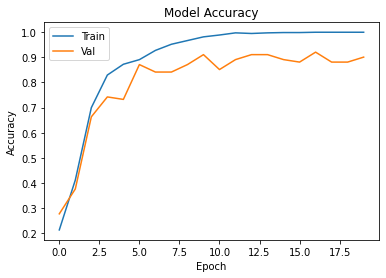

In [14]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val_loss'], loc='upper left')
plt.show()

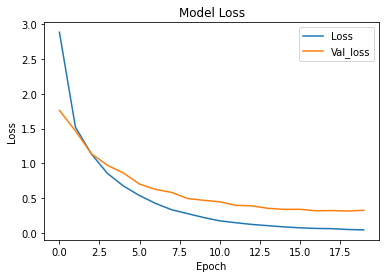

In [15]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_loss'], loc='upper right')
plt.show()

In [16]:
print('Validation image - evaluation')
_, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('accuracy score: ', acc*100 )

Validation image - evaluation
4/4 [==============================] - 10s 2s/step - loss: 0.3250 - categorical_accuracy: 0.9010
accuracy score:  90.09901285171509


In [17]:
# print('Test image - evaluation')
# _, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
# print('accuracy score: ', acc*100 )

#### Testing

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# test_data_dir = os.path.dirname("output_path_no_Plain_220x380v1/train-test/")

datagenerate_test = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)

test_generator = datagenerate_test.flow_from_directory(test_data_dir,
                                                target_size=(img_width,img_height),
                                                batch_size=batch_size,
                                                #subset="validation",
                                                class_mode='categorical')

Found 103 images belonging to 7 classes.


In [19]:
print('Test image - evaluation')
_, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('accuracy score: ', acc*100 )

Test image - evaluation
4/4 [==============================] - 9s 2s/step - loss: 0.2666 - categorical_accuracy: 0.9320
accuracy score:  93.20388436317444


In [35]:

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('accuracy: ', metrics.accuracy_score(y_pred,test_generator.classes))

4/4 [==============================] - 9s 2s/step
accuracy:  0.1553398058252427


In [36]:
print('Confusion Matrix')
print(confusion_matrix(y_pred, test_generator.classes))

Confusion Matrix
[[2 2 2 3 1 3 2]
 [4 3 4 2 2 0 2]
 [1 4 0 1 2 3 0]
 [1 1 2 0 1 2 1]
 [1 3 3 1 3 4 3]
 [3 4 1 1 5 4 2]
 [2 1 0 1 4 2 4]]


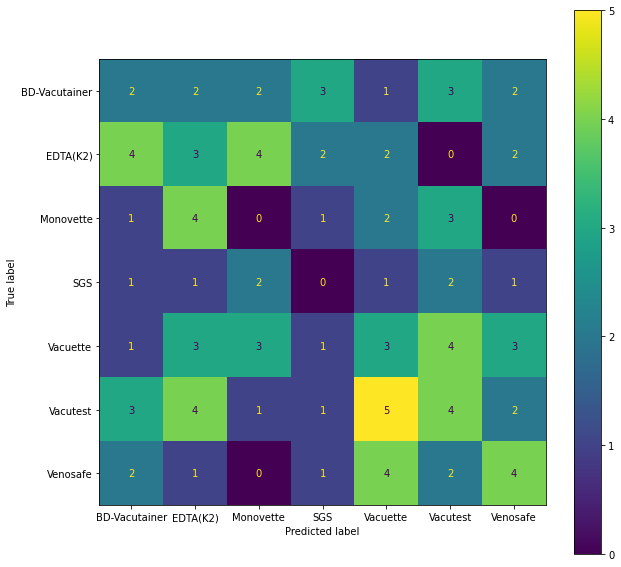

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, test_generator.classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=[ 'BD-Vacutainer', 'EDTA(K2)', 'Monovette','SGS', 'Vacuette' , 'Vacutest', 'Venosafe'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmd.plot(ax=ax)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy Score :', (accuracy_score(y_pred, test_generator.classes))*100) 
print ('Report : ')
target_names = ['BD-Vacutainer', 'EDTA(K2)', 'Monovette', 'SGS', 'Vacuette' , 'Vacutest', 'Venosafe']
print (classification_report(y_pred, test_generator.classes, target_names=target_names)) 

Accuracy Score : 0.1553398058252427
Report : 
               precision    recall  f1-score   support

BD-Vacutainer       0.14      0.13      0.14        15
     EDTA(K2)       0.17      0.18      0.17        17
    Monovette       0.00      0.00      0.00        11
          SGS       0.00      0.00      0.00         8
     Vacuette       0.17      0.17      0.17        18
     Vacutest       0.22      0.20      0.21        20
     Venosafe       0.29      0.29      0.29        14

     accuracy                           0.16       103
    macro avg       0.14      0.14      0.14       103
 weighted avg       0.16      0.16      0.16       103



The Accuracy score is 15.53%, this could be due to the image. One of the plausible issues i can think of that cause such a low accuracy is the fact that maybe the augmented image type has not been since by the model.
